In [2]:
import keras 
from keras.layers import LSTM,Dense,Conv1D,MaxPooling1D
from keras.models import Sequential,Model
from gensim.models import Word2Vec
from keras.layers import Bidirectional,TimeDistributed
import numpy as np
import codecs
import regex
import  matplotlib.pyplot as plt

In [3]:
data_div=1
sent=[]
tags=[]
with codecs.open("v1_train.kn","r",encoding="utf-8") as f:
    l1=[]
    l2=[]
    for i in f:
        x=i.split()
        if(x[0]=="newline"):
            sent.append(l1)
            tags.append(l2)
            l1=[]
            l2=[]
        else:
            l1.append(x[0])
            l2.append(x[1])

In [4]:
print(len(sent))
tag_count=0
for i in tags:
    for j in i:
        if(j!="other"):
            tag_count+=1
print(tag_count)
tag_map={'datenum': 0,
 'event': 0,
 'location': 0,
 'name': 0,
 'number': 0,
 'occupation': 0,
 'organization': 0,
 'other': 0,
 'things': 0}
for i in tags:
    for j in i:
        tag_map[j]+=1
print(tag_map)
print()

20536
35169
{'things': 242, 'event': 523, 'location': 10473, 'name': 15110, 'datenum': 1046, 'number': 3948, 'other': 262651, 'organization': 746, 'occupation': 3081}



In [3]:
from sklearn.model_selection import train_test_split
sent,pre_x_test,tags,pre_y_test=train_test_split(sent,tags,test_size=0.1,random_state=1)
print(len(sent))
print(len(tags))
print(len(pre_x_test))
print(len(pre_y_test))

18482
18482
2054
2054


/home/sagar/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sagar/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


0 : 6954
1 : 4245
2 : 2737
3 : 1663
4 : 1194
5 : 634
6 : 363
7 : 222
8 : 151
9 : 86
10 : 75
11 : 37
12 : 38
13 : 19
14 : 13
15 : 11
16 : 6
17 : 7
18 : 4
19 : 4
20 : 3
21 : 4
22 : 5
23 : 1
29 : 1
30 : 2
32 : 1
37 : 1
68 : 1


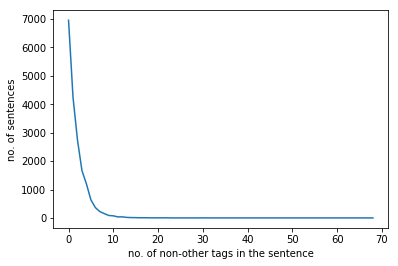

In [4]:
def get_data_distribution(sent,tags):
    cnt_dict={}
    for i in tags:
        cnt=0
        for j in i:
            if(j!="other"):
                cnt+=1
        if(cnt in cnt_dict):
            cnt_dict[cnt]+=1
        else:
            cnt_dict[cnt]=1
    cnt_list=list(cnt_dict.keys())
    cnt_list.sort()
    l1=[]
    l2=[]
    for i in cnt_list:
        print(i,":",cnt_dict[i])
        l1.append(i)
        l2.append(cnt_dict[i])
    plt.plot(l1,l2)
    plt.xlabel("no. of non-other tags in the sentence")
    plt.ylabel("no. of sentences")
    plt.show()
get_data_distribution(sent,tags)

In [5]:
def filter_data(sent,tags,exclude_list):
    sent_filter=[]
    tags_filter=[]
    for i in range(len(tags)):
    #     print(tags[i])
        cnt=0
        for j in tags[i]:
            if(j!="other"):
                cnt+=1
        if(cnt in exclude_list):
            continue
        if(cnt>=0):
            sent_filter.append(sent[i])
            tags_filter.append(tags[i])
    return sent_filter,tags_filter
sent_filter,tags_filter=filter_data(sent,tags,[])
print(len(sent_filter))
print(len(tags_filter))

18482
18482


In [6]:
sent=sent_filter
tags=tags_filter
def divide_data_pactise(sent,tags,data_div):
    print("initial_len=",len(sent))
    sent=sent[:len(sent)//data_div]
    tags=tags[:len(tags)//data_div]
    return sent,tags
sent,tags=divide_data_pactise(sent,tags,data_div)
print("new_len=",len(sent))

initial_len= 18482
new_len= 18482


In [7]:
for i in sent[:10]:
    print(i)

['ಆದರೆ', 'ಮೇ', '೧೯೯೮ರಲ್ಲಿ', 'ಇತಿಯೋಪಿಯದೊಂದಿಗೆ', 'ಪುನಃ', 'ಯುದ್ಧ', 'ಪ್ರಾರಂಭವಾದುದರಿಂದ', 'ಈ', 'ಸಂವಿಧಾನ', 'ಕಾರ್ಯಕ್ಕೆ', 'ಬಂದಿಲ್ಲ', '.']
['ಬ್ಯಾರಿಮೋರ್', 'ಅಭಿನಯದ', 'ಚಾರ್ಲೀಸ್\u200c', 'ಏಂಜೆಲ್ಸ್', '\u200c', ',', '50', 'ಫಸ್ಟ್\u200c', 'ಡೇಟ್ಸ್', '\u200c', ',', 'ಮತ್ತು', 'ಮ್ಯೂಸಿಕ್\u200c', 'ಅಂಡ್', 'ಲಿರಿಕ್ಸ್\u200c', 'ಎಂಬ', 'ಚಲನಚಿತ್ರಗಳ', 'ಜೊತೆಗೇ', ',', 'ಡೋನಿ', 'ಡಾರ್ಕೊ', 'ನಂಥ', 'ಧಾರ್ಮಿಕ', 'ನಂಬುಗೆಯ', 'ಕುರಿತಾದ', 'ಚಿತ್ರವನ್ನೂ', 'ಸಹ', 'ಫ್ಲವರ್', 'ಫಿಲ್ಮ್ಸ್\u200c', 'ಸಂಸ್ಥೆ', 'ನಿರ್ಮಿಸುತ್ತಾ', 'ಬಂದಿದೆ', '.']
['ಹದಿನಾರನೇ', 'ವಯಸ್ಸಿನಲ್ಲಿ', 'ಅವರು', 'ಭಾನುಶಿಂಘೊ', 'ಸೂರ್ಯ', 'ಸಿಂಹ', 'ಎಂಬ', 'ಗುಪ್ತನಾಮದಡಿ', 'ಮೊದಲ', 'ಮಹತ್ವದ', 'ಕವನವನ್ನು', 'ಪ್ರಕಟಿಸಿದರು', 'ಮತ್ತು', 'ಅವರು', 'ಮೊದಲು', 'ಸಣ್ಣ', 'ಕಥೆಗಳು', 'ಮತ್ತು', 'ನಾಟಕಗಳನ್ನು', '೧೮೭೭ರಲ್ಲಿ', 'ಬರೆದರು', '.']
['ಇಸವಿ', '2003ರಲ್ಲಿ', 'ಬಿಡುಗಡೆಯಾದ', 'ಹೇಯ್ಲ್\u200c', 'ಟು', 'ದಿ', 'ಥೀಫ್', '\u200c', 'ಆಲ್ಬಮ್\u200cನಲ್ಲಿ', 'ಯುದ್ಧದಿಂದ', 'ಸ್ಫೂರ್ತಿ', 'ಪಡೆದ', 'ಗಿಟಾರ್\u200c', '-', 'ಚಾಲಿತ', 'ರಾಕ್\u200c', ',', 'ವಿದ್ಯುನ್ಮಾನ', 'ಮತ್ತು', 'ಗೀತೆಗಳಿದ್ದವು', '.']
['ಮುಳ್ಳಯ್ಯನಗಿರಿ', 'ಭಾರತದ', 'ಕರ್ನಾಟಕ', 'ರಾಜ್ಯದ', 'ಚಿಕ್ಕಮಗಳೂರು'

In [8]:
max_sent_len=-1
for i in sent:
    if(len(i)>max_sent_len):
        max_sent_len=len(i)
print("max_sent_len",max_sent_len)
avg_sent_len=0
for i in sent:
    avg_sent_len+=len(i)
avg_sent_len=avg_sent_len/len(sent)
print("avg_sent_len",avg_sent_len)
max_len=int(2*(avg_sent_len))
# max_len=28
print("max_sent_len_fit",max_len)

max_sent_len 184
avg_sent_len 14.478844280921978
max_sent_len_fit 28


In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

In [10]:
# regex.findall(r'\X', sent[0][0])
def separate_into_char(sent):
    char=[]
    for i in sent:
        for j in i:
            l=regex.findall(r'\X',j)
            char.append(l)
    return char
char=separate_into_char(sent)

In [11]:

for i in char[:10]:
    print(i)


['ಆ', 'ದ', 'ರೆ']
['ಮೇ']
['೧', '೯', '೯', '೮', 'ರ', 'ಲ್', 'ಲಿ']
['ಇ', 'ತಿ', 'ಯೋ', 'ಪಿ', 'ಯ', 'ದೊಂ', 'ದಿ', 'ಗೆ']
['ಪು', 'ನಃ']
['ಯು', 'ದ್', 'ಧ']
['ಪ್', 'ರಾ', 'ರಂ', 'ಭ', 'ವಾ', 'ದು', 'ದ', 'ರಿಂ', 'ದ']
['ಈ']
['ಸಂ', 'ವಿ', 'ಧಾ', 'ನ']
['ಕಾ', 'ರ್', 'ಯ', 'ಕ್', 'ಕೆ']


In [12]:
char_embedding_size=50
word_min_count=1
c2v=Word2Vec(char,size=char_embedding_size,min_count=word_min_count)
# print(c2v.wv["ल"])
# c2v.wv.most_similar(positive="ा")

In [13]:
# c2v.wv.most_similar(positive="क")
len(c2v.wv.vocab)

1899

In [14]:
tokenizer_char=Tokenizer()
tokenizer_char.fit_on_texts(char)
char_index=tokenizer_char.word_index
print(len(char_index))
num_char=(len(char_index)*3)//4
print(num_char)

1899
1424


In [15]:
def add_unk_char(char_index,num_char):
    ref={}
    for i,j in char_index.items():
        if(j<=num_char):
            ref[i]=j
    ref["<UNK_CHAR>"]=num_char+1
    char_index=ref
    char_index_rev={}
    for (i,j) in char_index.items():
        char_index_rev[j]=i
    print(char_index["<UNK_CHAR>"])
    print(char_index_rev[char_index["<UNK_CHAR>"]])
    return char_index,char_index_rev
char_index,char_index_rev=add_unk_char(char_index,num_char)

1425
<UNK_CHAR>


In [16]:
print("No. of chars:",len(char_index))

No. of chars: 1425


In [17]:
max_char_len=-1
for i in char:
    if(len(i)>max_char_len):
        max_char_len=len(i)
print(max_char_len)
avg_char_len=0
for i in char:
    avg_char_len+=len(i)
avg_char_len=avg_char_len/len(char)
print(avg_char_len)
max_char_len=int(2*avg_char_len)
print("max_char_len_fit",max_char_len)

27
3.878216578599242
max_char_len_fit 7


In [18]:
tokenizer_sent=Tokenizer()
tokenizer_tags=Tokenizer()
tokenizer_sent.fit_on_texts(sent)
tokenizer_tags.fit_on_texts(tags)
word_index_sent=tokenizer_sent.word_index
word_index_tags=tokenizer_tags.word_index
print("No. of words:",len(word_index_sent))
print("No. of tags:",len(word_index_tags))
num_words=(len(word_index_sent)*3)//4
print(num_words)

No. of words: 68591
No. of tags: 9
51443


In [19]:

ref={}
for i,j in word_index_sent.items():
    if(j<=num_words):
        ref[i]=j
ref["<UNK_WORD>"]=num_words+1
word_index_sent=ref

In [20]:
word_index_rev_sent={}
word_index_rev_tags={}
for i,j in word_index_sent.items():
    word_index_rev_sent[j]=i
for i,j in word_index_tags.items():
    word_index_rev_tags[j]=i

In [21]:
# word_index_sent

In [22]:
word_char={}
for i,j in word_index_sent.items():
#     print(i,j)
    l=[]
    if(i=="<UNK_WORD>"):
        l=[char_index["<UNK_CHAR>"]]*max_char_len
        word_char[i]=l
#         print(l)
        continue
    for k in regex.findall(r'\X',i):
        if(k in char_index):
#             print(k,end="-")
            h=char_index[k]
        else:
#             print(k)
            h=char_index["<UNK_CHAR>"]
#         else:
#             print(i)
#             print(k,end="-")
#             h=char_index["<UNK_CHAR>"]
#             print("********")
#             print("------------------------------")
#             #         print(h)
        l.append(h)
    word_char[i]=l

In [23]:
# for i in word_char.items():
#     print(i)
# print(word_char["<UNK_WORD>"])

In [24]:
for i,j in word_char.items():
    word_char[i]=pad_sequences([j],maxlen=max_char_len,padding="post")[0]

In [25]:
print(len(word_char))
counter=0
for i in word_char.items():
    print(i)
    counter+=1
    if(counter==10):break

51444
('ಕೊಂಬು', array([175, 210,   0,   0,   0,   0,   0], dtype=int32))
('ಮಾದರಿಗೆ', array([42,  2, 20, 50,  0,  0,  0], dtype=int32))
('ಆರ್ಥ್ರೈಟಿಸ್', array([ 44,  13, 297, 265,  74,  18,   0], dtype=int32))
('ದಿಲ್ಲಿಯಲ್ಲಿ', array([54,  4, 10,  3,  4, 10,  0], dtype=int32))
('ಹನ್ನೆರಡನೆಯ', array([53, 11, 72,  1, 47, 72,  3], dtype=int32))
('ಶೈಲ', array([321,  30,   0,   0,   0,   0,   0], dtype=int32))
('ವಜ್ರಾಕಾರದಲ್ಲಿರುವ', array([45,  1,  2,  4, 10, 16,  5], dtype=int32))
('ನುಡಿಯುತ್ತಾರೆ', array([28, 48, 76,  7, 78, 46,  0], dtype=int32))
('ತಂಡಗಳಲ್ಲಿ', array([162,  47,   8,  24,   4,  10,   0], dtype=int32))
('ರಾಯ್\u200cಸೇನ್', array([ 31, 491, 161,  11,   0,   0,   0], dtype=int32))


In [26]:
# word_char={}
# for i,j in word_index_sent.items():
#     l=[]
#     for k in regex.findall(r'\X',i):
#         if(k in char_index):
#             l.append(char_index[k])
#         else:
#             l.append(char_index["<UNK_CHAR>"])
#     word_char[i]=l
# for i,j in word_char.items():
#     word_char[i]=pad_sequences([j],maxlen=max_char_len,padding="post")[0]

In [27]:
# 

In [28]:
print(len(word_char))
counter=0
for i in word_char.items():
    print(i)
    counter+=1
    if(counter==10):break

51444
('ಕೊಂಬು', array([175, 210,   0,   0,   0,   0,   0], dtype=int32))
('ಮಾದರಿಗೆ', array([42,  2, 20, 50,  0,  0,  0], dtype=int32))
('ಆರ್ಥ್ರೈಟಿಸ್', array([ 44,  13, 297, 265,  74,  18,   0], dtype=int32))
('ದಿಲ್ಲಿಯಲ್ಲಿ', array([54,  4, 10,  3,  4, 10,  0], dtype=int32))
('ಹನ್ನೆರಡನೆಯ', array([53, 11, 72,  1, 47, 72,  3], dtype=int32))
('ಶೈಲ', array([321,  30,   0,   0,   0,   0,   0], dtype=int32))
('ವಜ್ರಾಕಾರದಲ್ಲಿರುವ', array([45,  1,  2,  4, 10, 16,  5], dtype=int32))
('ನುಡಿಯುತ್ತಾರೆ', array([28, 48, 76,  7, 78, 46,  0], dtype=int32))
('ತಂಡಗಳಲ್ಲಿ', array([162,  47,   8,  24,   4,  10,   0], dtype=int32))
('ರಾಯ್\u200cಸೇನ್', array([ 31, 491, 161,  11,   0,   0,   0], dtype=int32))


In [29]:
word_char_int={}
for i,j in word_char.items():
    word_char_int[word_index_sent[i]]=j
# for i in word_char_int.items():
#     print(i)



In [30]:
word_char_embedding_matrix=np.zeros((len(word_char) + 1, max_char_len))
for i,j in word_char_int.items():
    word_char_embedding_matrix[i]=j

In [31]:
# for i in word_char_embedding_matrix:
#     print(i)


In [32]:
char_embedding_matrix = np.zeros((len(word_char) + 1, char_embedding_size))
for i,j in char_index_rev.items():
    if(j in c2v.wv.vocab):
        char_embedding_matrix[i]=c2v.wv[j]
print(char_embedding_matrix.shape)

(51445, 50)


In [33]:
# for i in char_embedding_matrix:
#     print(i)

In [34]:
char_int=[]
for i in word_char_int.items():
    char_int.append(i[1])
# print(char_int)

In [35]:
word_index_tags

{'datenum': 6,
 'event': 8,
 'location': 3,
 'name': 2,
 'number': 4,
 'occupation': 5,
 'organization': 7,
 'other': 1,
 'things': 9}

In [36]:
# word_char["<UNK_WORD>"]#array([2389, 2389, 2389, 2389, 2389], dtype=int32)
# word_index_sent["<UNK_WORD>"]#2389
for i,j in word_index_rev_sent.items():
    if(j=="<UNK_WORD>"):
        print(j)


<UNK_WORD>


In [37]:
sent_int=[]
for i in sent:
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    sent_int.append(l)
tags_int=[]
for i in tags:
    l=[]
    for j in i:
        l.append(word_index_tags[j])
    tags_int.append(l)


In [38]:
sent_int_padded=pad_sequences(sent_int,maxlen=max_len,padding='post')
tags_int_padded=pad_sequences(tags_int,maxlen=max_len,padding="post")
# for i in tags_int_padded:
#     print(i)

In [39]:
embedding_size=100
workers=5
window_size=5
word_min_count=1

In [40]:
# for i in sent:
#     print(i)

In [41]:
w2v=Word2Vec(sent,size=embedding_size,workers=workers,window=window_size,min_count=word_min_count)
embedding_matrix = np.zeros((len(word_index_sent) + 1, embedding_size))
print(embedding_matrix.shape)

(51445, 100)


In [42]:
for i,j in word_index_rev_sent.items():
    if(j in w2v.wv.vocab):
        embedding_matrix[i]=w2v.wv[j]
print(embedding_matrix)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.69039822e+00  1.75935924e+00  7.89886527e-03 ... -2.01635289e+00
   9.35428739e-01  9.63869393e-01]
 [ 2.18356848e+00  2.07963681e+00 -7.60598630e-02 ... -2.65754223e+00
   1.02503645e+00 -4.74411309e-01]
 ...
 [ 3.98564991e-03  7.27030449e-04  2.29843287e-03 ... -2.77159573e-03
   6.21093996e-03 -2.06276382e-04]
 [ 1.02102337e-03 -2.62002926e-03  1.61800918e-03 ...  1.97861344e-03
   5.56464866e-03  8.42648442e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [43]:
tag_dir={}
for i in word_index_tags.items():
    print(i)
    tag_dir[i[0]]=np.eye(len(word_index_rev_tags))[i[1]-1]
print(tag_dir)

('location', 3)
('organization', 7)
('other', 1)
('name', 2)
('number', 4)
('datenum', 6)
('things', 9)
('occupation', 5)
('event', 8)
{'location': array([0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'number': array([0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'other': array([1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'name': array([0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'organization': array([0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'datenum': array([0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'things': array([0., 0., 0., 0., 0., 0., 0., 0., 1.]), 'occupation': array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'event': array([0., 0., 0., 0., 0., 0., 0., 1., 0.])}


In [44]:
print(tags_int_padded.shape)

(18482, 28)


In [45]:
tags_vec=[]
count=0
for i in tags_int_padded:
    l=[]
    for j in i:
#         print(j,end="____")
        if(j==0):
            l.append(tag_dir["other"])
        else:
            l.append(tag_dir[word_index_rev_tags[j]])
    l=np.array(l)
#     print(l.shape)
#     print(count)
    count+=1
    tags_vec.append(l)

In [46]:
print(sent_int_padded.shape)
print(tags_int_padded.shape)
print(np.array(tags_vec).shape)
print(sent[0])

print(tags[0])

(18482, 28)
(18482, 28)
(18482, 28, 9)
['ಆದರೆ', 'ಮೇ', '೧೯೯೮ರಲ್ಲಿ', 'ಇತಿಯೋಪಿಯದೊಂದಿಗೆ', 'ಪುನಃ', 'ಯುದ್ಧ', 'ಪ್ರಾರಂಭವಾದುದರಿಂದ', 'ಈ', 'ಸಂವಿಧಾನ', 'ಕಾರ್ಯಕ್ಕೆ', 'ಬಂದಿಲ್ಲ', '.']
['other', 'other', 'other', 'name', 'other', 'other', 'other', 'other', 'event', 'other', 'other', 'other']


In [47]:
tags_vec=np.array(tags_vec)


In [48]:
num_hidden_units=300
from keras.layers import Embedding,InputLayer,Conv1D,MaxPooling1D,Input,Flatten,concatenate,merge,Reshape,Dropout

In [49]:
inputs0=Input(shape=(max_len,))
emb0=Embedding(len(word_index_sent)+1,max_char_len,weights=[word_char_embedding_matrix],trainable=False,input_length=max_len)(inputs0)
emb01=TimeDistributed(Embedding(len(word_char)+1,char_embedding_size,weights=[char_embedding_matrix],trainable=False,input_length=max_char_len))(emb0)
conv0=TimeDistributed(Conv1D(filters=20,kernel_size=5,padding="same",activation="relu"))(emb01)
conv01=TimeDistributed(Conv1D(filters=11,kernel_size=5,padding="same",activation="relu"))(conv0)
maxpool0=TimeDistributed(MaxPooling1D(pool_size=max_char_len))(conv01)
# dropout0=TimeDistributed(Dropout(0.25))(maxpool0)
newdim = tuple([x for x in maxpool0.shape.as_list() if x != 1 and x is not None])
reshape0= Reshape(newdim) (maxpool0)

In [50]:
print(emb01)
print(conv0)
print(conv01)

Tensor("time_distributed_1/Reshape_1:0", shape=(?, 28, 7, 50), dtype=float32)
Tensor("time_distributed_2/Reshape_2:0", shape=(?, 28, 7, 20), dtype=float32)
Tensor("time_distributed_3/Reshape_2:0", shape=(?, 28, 7, 11), dtype=float32)


In [51]:
inputs1=Input(shape=(max_len,))
emb1=Embedding(len(word_index_sent)+1,embedding_size,weights=[embedding_matrix],trainable=False,input_length=max_len)(inputs1)          
concat_0_1=concatenate([emb1,reshape0],axis=-1)
conv1=Conv1D(filters=15,kernel_size=5,padding="same",activation="relu")(concat_0_1)
# dropout1=Dropout(0.25)(conv1)

In [52]:
inputs2=Input(shape=(max_len,))
emb2=Embedding(len(word_index_sent)+1,embedding_size,weights=[embedding_matrix],trainable=False,input_length=max_len)(inputs2)
concat_1_2=concatenate([emb2,conv1],axis=-1)
layers=Bidirectional(LSTM(units=num_hidden_units,input_shape=(max_len,embedding_size),return_sequences=True))(concat_1_2)
# dropout2=Dropout(0.25)(layers)
layers=TimeDistributed(Dense(100))(layers)
layers=TimeDistributed(Dense(100))(layers)
layers=TimeDistributed(Dense(len(word_index_tags),activation="softmax"))(layers)


In [53]:
model=Model(inputs=[inputs0,inputs1,inputs2],outputs=layers)
model.compile(optimizer="adam",metrics=["mae","acc"],loss="categorical_crossentropy")


In [54]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(sent_int_padded,tags_vec,test_size=0.3,random_state=1)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
x_train=sent_int_padded
y_train=tags_vec

In [55]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 28, 7)        360115      input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 28, 7, 50)    2572250     embedding_1[0][0]                
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 28, 7, 20)    5020        time_distributed_1[0][0]         
__________________________________________________________________________________________________
time_distr

In [56]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True)


In [57]:
for i in model.layers:
    print(i.name)
    print(i.input_shape)
    print(i.output_shape)
    print("--------------------")

input_1
(None, 28)
(None, 28)
--------------------
embedding_1
(None, 28)
(None, 28, 7)
--------------------
time_distributed_1
(None, 28, 7)
(None, 28, 7, 50)
--------------------
time_distributed_2
(None, 28, 7, 50)
(None, 28, 7, 20)
--------------------
time_distributed_3
(None, 28, 7, 20)
(None, 28, 7, 11)
--------------------
input_2
(None, 28)
(None, 28)
--------------------
time_distributed_4
(None, 28, 7, 11)
(None, 28, 1, 11)
--------------------
embedding_3
(None, 28)
(None, 28, 100)
--------------------
reshape_1
(None, 28, 1, 11)
(None, 28, 11)
--------------------
input_3
(None, 28)
(None, 28)
--------------------
concatenate_1
[(None, 28, 100), (None, 28, 11)]
(None, 28, 111)
--------------------
embedding_4
(None, 28)
(None, 28, 100)
--------------------
conv1d_3
(None, 28, 111)
(None, 28, 15)
--------------------
concatenate_2
[(None, 28, 100), (None, 28, 15)]
(None, 28, 115)
--------------------
bidirectional_1
(None, 28, 115)
(None, 28, 600)
--------------------
time_

In [58]:
# for i in y_train:
# #     print(i)
#     print(len(i))
#     print("------------------")
len(char_index_rev)

1425

In [59]:
# for i in x_train[:1000]:
#     for j in i:
#         if(j==0):
#             break
#         print(word_index_rev_sent[j],end="/")
#         l=[]
#         for k in word_char_int[j]:
#             if(k==0):
#                 break
#             l.append(char_index_rev[k])
#         print("".join(l),end=" ")
#     print()

In [60]:
from keras.callbacks import EarlyStopping

In [61]:
epochs=10
prev_loss=1
loss_increase_warning=0
# for i in range(epochs):
his=model.fit(x=[x_train,x_train,x_train],y=y_train,validation_split=0.2,epochs=25, batch_size=10,callbacks=[
    EarlyStopping(monitor="val_loss",mode="auto",patience=2)])

Train on 14785 samples, validate on 3697 samples
Epoch 1/25
  190/14785 [..............................] - ETA: 7:36 - loss: 0.6739 - mean_absolute_error: 0.0476 - acc: 0.8835

KeyboardInterrupt: 

In [ ]:
# model.evaluate([x_test,x_test,x_test],y_test)

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model_hindi_safe.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model_hindi_safe.h5")
# print("Saved model to disk")

In [ ]:
model.save("ner_kannada_safe_final.h5")

In [69]:
##### to predict load the new model along with the weights
from keras.models import load_model
model = load_model('ner_kannada_safe_final.h5')

In [ ]:
# model.evaluate([x_test,x_test,x_test],y_test)==model2.evaluate([x_test,x_test,x_test],y_test)

In [ ]:

# ans=model.predict([x_test,x_test,x_test])
# c_other=0
# i_other=0
# c_non=0
# i_non=0


In [ ]:
# #### to predict load the new model along with the weights
# from keras.models import load_model
# model = load_model('ner_kannada_safe_final.h5')

In [ ]:
# pre_x_test

In [63]:
# x_test
# y_test
pre_x_test_int=[]
for i in pre_x_test:
#     print(i)
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    pre_x_test_int.append(l)
padded_x_test=pad_sequences(pre_x_test_int,maxlen=max_len,padding="post")


In [64]:
for i in padded_x_test:
    if(len(i)!=max_len):
        print(i)
# padded_x_test=np.array(padded_x_test)

In [65]:
ans=model.predict([padded_x_test,padded_x_test,padded_x_test])

In [66]:
my_ans=[]
for i in range(len(ans)):
#     print(len(ans[i]))
#     print(len(pre_x_test[i]))
    l=[]
    for j in range(len(pre_x_test[i])):
        if(j<len(ans[i])):
#             print(np.argmax(ans[i][j]),end="_")
            l.append(word_index_rev_tags[np.argmax(ans[i][j])+1])
#             printprint(len(pre_x_test))
# print(len(pre_y_test))
# print(len(my_ans))(word_index_rev_tags[np.argmax(ans[i][j])+1])
        else:
            l.append("other")
#             print(0,end="_")
#     print(l)
    my_ans.append(l)

In [67]:
correct=0
incorrect=0
for i in range(len(my_ans)):
#     print(pre_x_test[i])
#     print(pre_y_test[i])
#     print(my_ans[i])
    for j,k in zip(my_ans[i],pre_y_test[i]):
        if(j==k):
            correct+=1
        else:
            incorrect+=1
#     print("-----------------------------------------------------------------")
print("accuracy=",(correct)/(correct+incorrect))

accuracy= 0.9234663490172722


In [68]:
confusion_matrix=np.zeros(shape=(len(word_index_rev_tags),len(word_index_rev_tags)),dtype="int32")
for i,j in zip(my_ans,pre_y_test):
#     print(i)
#     print(j)
#     print("----------------")
    for ii,jj in zip(i,j):
        x=word_index_tags[ii]
        y=word_index_tags[jj]
#         print(x,y)
        confusion_matrix[x-1][y-1]+=1
#         for i in confusion_matrix:
#             print(i)
#         print("-------------------")
print(confusion_matrix)

[[26073   884   416   173   119    75    38    21     4]
 [  149   628    31     1    11     1     8     5     5]
 [  136    29   713     2    17     1     3     3     1]
 [   73     4     2   258     2     7     0     1     3]
 [   28     8     3     0   145     0     1     1     0]
 [   28     0     0     2     0    39     0     0     0]
 [    4     1     0     0     0     0    29     0     0]
 [    3     4     0     0     2     0     0    21     3]
 [    0     0     0     0     0     0     0     0     3]]


In [ ]:
for i in range(len(word_index_rev_tags)):
    print(word_index_rev_tags[i+1])
    row_sum=0
    col_sum=0
    for j in range(len(word_index_rev_tags)):
        row_sum+=confusion_matrix[i][j]
        col_sum+=confusion_matrix[j][i]
    p=confusion_matrix[i][i]/row_sum
    r=confusion_matrix[i][i]/col_sum
    f1=(2*p*r)/(p+r)
    print("precision=",p)
    print("recall=",r)
    print("f1 score=",f1)
    print('----------------------')

In [ ]:
c_other=0
i_other=0
c_non=0
i_non=0
for i,j in zip(pre_y_test,my_ans):
#     print(i,j)
    for ii,jj in zip(i,j):
#         print(x,y)
        x=ii
        y=jj
        if(x==y):
            if(x=="other"):
                c_other+=1
            else:
                c_non+=1
        elif(x!=y):
            if(x=="other"):
                i_other+=1
            else:
                i_non+=1
#other accuracy
print("other accuracy")
print("correct",c_other)
print("incorrect",i_other)
print(c_other/(c_other+i_other))


# In[ ]:


print("non other accuracy")
print("correct",c_non)
print("incorrect",i_non)
print(c_non/(c_non+i_non))

In [78]:
#################final testing########################
data_div=1
pre_x_test=[]
with codecs.open("v1_test1.kn","r",encoding="utf-8") as f:
    l1=[]
    for i in f:
        i=i.strip()
        if(i=="newline"):
            pre_x_test.append(l1)
#             print(len(pre_x_test))
            l1=[]
        else:
            l1.append(i)

In [79]:
# x_test
# y_test
pre_x_test_int=[]
for i in pre_x_test:
#     print(i)
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    pre_x_test_int.append(l)
padded_x_test=pad_sequences(pre_x_test_int,maxlen=max_len,padding="post")


In [81]:
ans=model.predict([padded_x_test,padded_x_test,padded_x_test])

In [82]:
my_ans=[]
for i in range(len(ans)):
#     print(len(ans[i]))
#     print(len(pre_x_test[i]))
    l=[]
    for j in range(len(pre_x_test[i])):
        if(j<len(ans[i])):
#             print(np.argmax(ans[i][j]),end="_")
            l.append(word_index_rev_tags[np.argmax(ans[i][j])+1])
#             printprint(len(pre_x_test))
# print(len(pre_y_test))
# print(len(my_ans))(word_index_rev_tags[np.argmax(ans[i][j])+1])
        else:
            l.append("other")
#             print(0,end="_")
#     print(l)
    my_ans.append(l)

In [83]:
fl=open("q1.kn","w")
for i in range(len(pre_x_test)):
#     print(pre_x_test[i])
#     print(my_ans[i])
    for j in range(len(pre_x_test[i])):
        fl.write(my_ans[i][j]+"\n")
    fl.write("newline\n")
#     print("---------------------")
fl.close()